#### @htnm

# DataPreprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


class DataPreprocessing():
    def __init__(self):
        # Auto initialize necessary attributes of the object
        self.dataframe = None
        self.X = None
        self.y = None
        
    def read_from_csv(self):
        # Read data from .csv file into the dataframe and display the first 5 rows
        df = pd.read_csv('real_estate.csv', index_col='No')
        self.dataframe = df
        #print(df.head)
        #print(df.iloc[0][1])

    def set_attributes_and_output(self):
        # Set X and y to data attributes and output from the dataframe
        
        ##################
        # YOUR CODE HERE #
        ##################

        #print(self.dataframe)
        self.X = self.dataframe.values[:, :-1]
        self.y = self.dataframe.values[:, -1]
        
    def final_train_test_data(self, attributes_list=[0,1,2,3,4,5], test_size=0.2):
        # Split the data X and output y into training data and testing data
        # Output: a tuple (X_train, X_test, y_train, y_test), 
        # using train_test_split with random_state=42
        return \
                 train_test_split(
                     self.X[:, attributes_list], 
                     self.y, 
                     random_state = 42, 
                     test_size = test_size)
                 
    def visualize_data(self):
        # Visualize relation between each attribute and output
        columns_plot = np.array(self.dataframe.columns)[:-1].reshape(3, -1)
        fig, ax = plt.subplots(3, 2, figsize=(10,8), sharey=True)
        fig.suptitle('Correlation between each attribute and the house price of unit area')

        for i in range(3):
            for j in range(2):
                ax[i,j].scatter(self.X[:,i*2 + j], self.y, s=10, color="bgrcmy"[i*2+j])
                ax[i,j].set_xlabel(columns_plot[i, j].split(' ', 1)[1].title())

        fig.tight_layout()   
        fig.add_subplot(111, frameon=False)
        plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
        plt.ylabel(self.dataframe.columns[-1].split(' ', 1)[1].title())
        plt.show()
        

In [2]:
dp = DataPreprocessing()
dp.read_from_csv()
dp.set_attributes_and_output()
print('First house\'s age:', dp.X[0][1])
print('House price/unit are:', dp.y[0])

First house's age: 32.0
House price/unit are: 37.9


In [3]:
dp = DataPreprocessing()
dp.read_from_csv()
dp.set_attributes_and_output()

X_train, X_test, y_train, y_test = \
    dp.final_train_test_data(attributes_list=[2,4,5], test_size=0.2)
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (331, 3)
Shape of y_train:  (331,)
Shape of X_test:  (83, 3)
Shape of y_test:  (83,)


     X1 transaction date  X2 house age  \
No                                       
1               2012.917          32.0   
2               2012.917          19.5   
3               2013.583          13.3   
4               2013.500          13.3   
5               2012.833           5.0   
..                   ...           ...   
410             2013.000          13.7   
411             2012.667           5.6   
412             2013.250          18.8   
413             2013.000           8.1   
414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
No                                                                             
1                                  84.87882                               10   
2                                 306.59470                                9   
3                                 561.98450                                5   
4                                 561.98450          

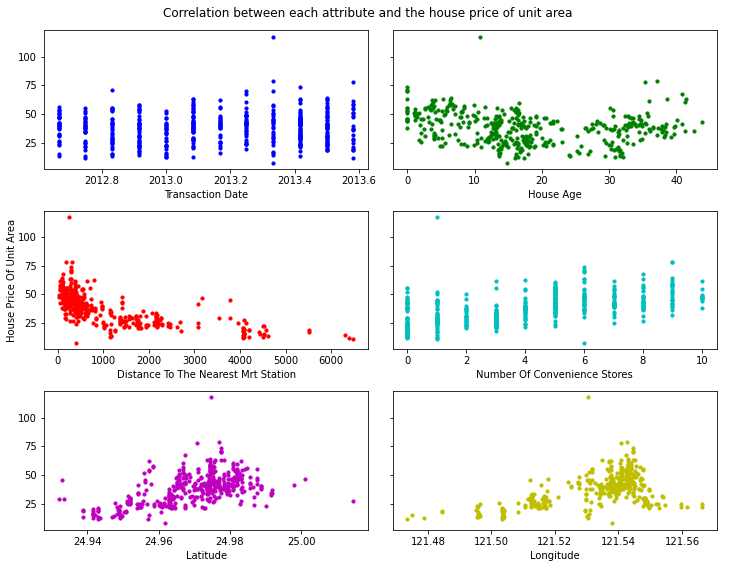

In [4]:
dp = DataPreprocessing()
dp.read_from_csv()
dp.set_attributes_and_output()

print(dp.dataframe)
dp.visualize_data()

# BaseClassRegressionAnalysis

In [5]:
from sklearn.metrics import mean_squared_error

class BaseClassRegressionAnalysis():
    def __init__(self):
        # Initialize a regressor, which will handle the LinearRegression model 
        self.regressor = LinearRegression()
    
    def fit(self, X, y):
        # The regressor learn from the training data with input X and output y
        self.regressor.fit(X, y)
        
    def predict(self, X):
        # The regressor predict the result with input X (after being trained)
        # The output has the same size as output y
        return self.regressor.predict(X)
    
    def mean_square_error(self, y_real, y_predict):
        # Compare the 2 output vectors: real output and prediction, using mean square error
        return mean_squared_error(y_real, y_predict)
        
    def visualize_prediction(self, y_real, y_predict):
        # Visualize the 2 output vectors: real output and prediction with each instances 
        x = np.arange(y_real.shape[0]) # Numbering the instances from 0 for x-axis of the plot
        plt.plot(x, y_real, label = 'Real')
        plt.plot(x, y_predict, label = 'Predict')
        plt.xlabel('Instances')
        plt.ylabel('Prediction & Real Prices')
        plt.legend()
        plt.show()


# LinearRegressionAnalysis

In [6]:
class LinearRegressionAnalysis(BaseClassRegressionAnalysis):
    pass

# PolynomialRegressionAnalysis

In [7]:
class PolynomialRegressionAnalysis(BaseClassRegressionAnalysis):
    def __init__(self, degree):
        super().__init__()
        self.degree = degree
    
    def __poly_transform(self, X):
        poly = PolynomialFeatures(degree=self.degree)
        Xt = poly.fit_transform(X)
        return Xt
    
    def fit(self, X, y, degree=2):
        Xt = self.__poly_transform(X)
        super().fit(Xt, y)
        
    def predict(self, X):
        Xt = self.__poly_transform(X)
        return super().predict(Xt)

# Predictions

## Linear regression predictions

First 10 instances prediction (rounded to 1 decimal place):      [42.7 40.8 44.7 45.1 30.5 43.8 46.1 46.1 32.9 45.4]
Real output of first 10 instances (rounded to 1 decimal place):  [45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59. ]
Mean square error:  73.2442403892939


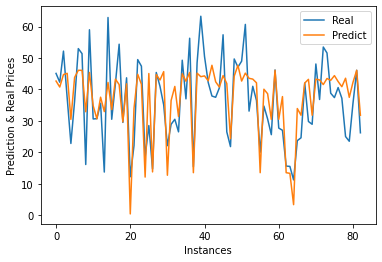

In [8]:
# Step 1: Initialize a regressor (a model) to learn from data
lr = LinearRegressionAnalysis()

# Step 2: The regressor will learn from the input and output of training data
lr.fit(X_train, y_train)

# Step 3: After learning from training data, the model will make a prediction based on input testing data
y_pred = lr.predict(X_test)

# Step 4: Comparision and visualization
print('First 10 instances prediction (rounded to 1 decimal place):     ', np.array([round(i, 1) for i in y_pred[:10]]))
print('Real output of first 10 instances (rounded to 1 decimal place): ', y_test[:10])
print('Mean square error: ', lr.mean_square_error(y_test, y_pred))
lr.visualize_prediction(y_test, y_pred)

## Polynomial (of degree 2) regression predictions

First 10 instances prediction (rounded to 1 decimal place): [44.5 40.5 47.2 48.6 22.8 44.8 48.9 48.9 29.7 48.8]
Real output of first 10 instances (rounded to 1 decimal place): [45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59. ]
Mean square error (rounded to 1 decimal place): 63.8


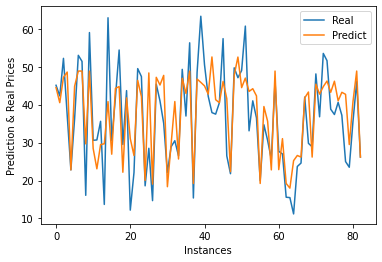

In [9]:
# Step 1: Initialize a regressor (a model) to learn from data

##################
# YOUR CODE HERE #
##################
pr = PolynomialRegressionAnalysis(2)

# Step 2: The regressor will learn from the input and output of training data
X_train, X_test, y_train, y_test = \
    dp.final_train_test_data(attributes_list=[2,4,5], test_size=0.2)
pr.fit(X_train, y_train)

# Step 3: After learning from training data, the model will make a prediction based on input testing data
y_pred = pr.predict(X_test)

# Step 4: Comparision and visualization
print('First 10 instances prediction (rounded to 1 decimal place):', np.array([round(i, 1) for i in y_pred[:10]]))
print('Real output of first 10 instances (rounded to 1 decimal place):', y_test[:10])
print('Mean square error (rounded to 1 decimal place):', round(pr.mean_square_error(y_test, y_pred),1))
pr.visualize_prediction(y_test, y_pred)